# **Attention Is All You Need**

### Abstract

 - 2017년 구글팀이 발표한 논문.

- 기존 시퀀스 변환 모델은 인코더와 디코더가 포함된 복잡한 순환 신경망(RNN)이나 합성곱 신경망(CNN)을 기반으로 한다.

- 논문에서는 순환이나 합성곱 없이 Attention 매커니즘만 사용하는 Transformer를 제안

- 영어-독일어 번역 작업, 영어-프랑스어 번역 작업 이 두가지 작업에 대한 실험에서 제안된 Transformer 모델이 병렬적으로 시퀀스 데이터를 처리하여 품질 면에서 우수하고, 
훈련시간이 적게 든다는 것을 보여준다.

- 영어-독일어 작업에서는 기존의 최고 성능 모델보다 2 BLEU 이상 향상된 결과를 보이고,
영어-프랑스어 작업에서는 단일 모델에서 최고 BLEU 점수 41.8을 기록하였다.

- 이전 모델과 비교했을 때 학습 효과가 좋다는 것을 보여준다.

### Introduction

- RNN, LSTM, GRU 등 다양한 모델은 시퀀스 모델로 활용이 되고 있었다.
이러한 모델들은 한번에 한 단어씩 넣는 방식처럼 시퀀스에 포함되어 있는 각각의 토큰들에 대한 순서 정보를 먼저 정렬시킨 뒤 그것을 반복적으로 입력으로 넣어서 hidden state 값을 갱신시키는 방법으로 동작을 한다. 그래서 시퀀스에 길이 만큼 입력을 넣어야 하기 때문에 병렬처리가 어렵다.
즉, 레이어의 output은 행렬곱으로 바로 구할 수 없고, 문장의 길이만큼 입력을 수행할 필요가 있기 때문에 메모리나 속도 측면에서 비효율성을 야기할 수 있다고 한다.

- 어텐션 매커니즘은 매번 출력 단어를 만들어낼 때마다 소스문장의 출력 정보 중에서 어떤 정보가 가장 중요한지에 대해서 가중치를 부여하도록 해서 그러한 가중치가 적용되어 곱해진 hidden state 값을 이용해서 출력단어를 보다 효과적으로 만들 수 있다고 한다.
어텐션도 RNN과 함께 사용되는 경우가 많았다.

- 본 논문에서는 어텐션 매커니즘만 사용하여 한번에 행렬 곱으로 위치정보가 포함된 전체 시퀀스를 한번에 처리, 즉, 순차적으로 입력을 처리하지 않아도 되므로(병렬처리) 이러한 특징을 활용하여 8개의 P100 GPU를 사용하여 학습을 해본 결과 좋은 base model의 성능을 얻을 수 있었다.


### Background

- 셀프 어텐션은 하나의 시퀀스가 있을 때 그 시퀀스에 포함되어 있는 서로 다른 위치에 대한 정보가 서로가 서로에게 가중치를 부여하도록 만들어서 하나의 시퀀스에 대한 representation 을 효과적으로 학습하고 표현할 수 있도록 만들어 준다.

- 논문에서는 Transformer는 시퀀스간 변형이 이루어 지도록 만들어진 것이라고 한다.

### Model Architecture

- 시퀀스간 변형 모델에 대해서 많은 Architecture들은 인코더 디코더 구조를 따르고 있다.
N개의 토큰으로 구성된 입력 시퀀스가 있을 때 어떠한 임베딩 벡터로 바꾸어 주고, 이러한 임베딩 벡터가 들어왔을 때 디코더는 m개의 토큰으로 구성된 출력 문장을 만들어낸다. 
이때, 기본적으로 RNN구조를 따르는 모델들은 이전 단계에서 생성되었던 것을 기준으로 다음에 나올 출력값을 만드는 방식
트랜스포머도 인코더와 디코더를 사용하지만 어텐션 메커니즘만 활용하여 시퀀스에 대한 정보를 한번에 입력으로 준다.

- RNN을 사용하지 않는 대신에 문장 내에 포함되어 있는 각각의 단어들의 위치 정보를 인코딩해서 입력하기 위해 positional encoding을 사용
멀티헤드 어텐션은 셀프 어텐션으로 진행<br>
정규화 – feed forword – 정규화를 n번만큼 수행하여 마지막에 나온 출력값을 인코더 디코더에서 사용 가능

- 디코더에서는 지금까지 출력된 단어만 어텐션하기 위해 학습을 할 때 마스크를 씌워서 뒤쪽 단어는 알지 못하게 막아 모델이 정상적인 데이터만 학습할 수 있도록 함.


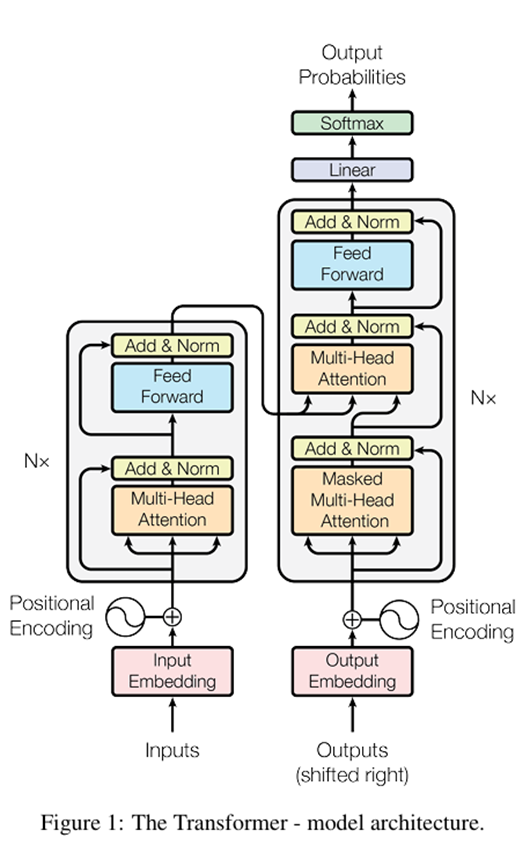
- 인코더<br>
6개의 동일한 레이어로 이루어져 있으며 하나의 인코더는 Self-Attention layer와 Feed Forward라는 두개의 레이어로 이루어져있다.

- 디코더<br>
6개의 동일한 레이어로 각 레이어는 인코더가 Sub layer로 가진 Self-Attetion layer와 Feed Forward외에 하나의 레이어를 더 가졌다.<br>
이때, 인코더의 출력에 대해 Multi head Attention을 수행한다.<br>
그리고 처음 Multi head Attention을 수행할 때는 마스크를 씌워 뒤쪽 단어는 알지 못하게 막아 정상적인 데이터만 학습할 수 있도록 한다.

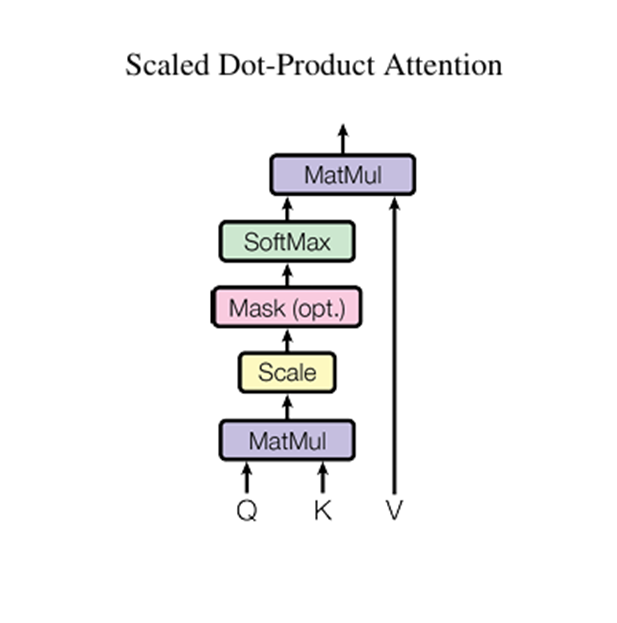
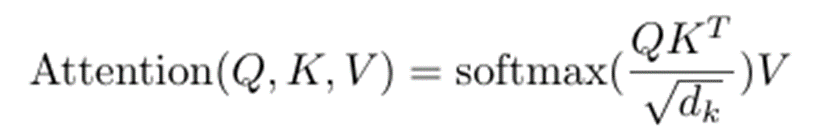

- Scaled Dot-Product Attention
<br>
Q: 영향을 받는 벡터<br>
K: 영향을 주는 벡터<br>
V: 주는 영향의 가중치 벡터<br>

먼저 Q(query) * K(key) 로 attention score를 계산하고 K의 차원 수로 나누어 softmax를 적용한다.<br>
이때, softmax의 결과 값은 K값에 해당하는 단어가 현재 단어에 어느정도 연관성이 있는지를 나타낸다.<br>

Softmax 값과 V(value)값을 곱하여 모두 더한다. 그러면 문장 속에서 지닌 입력 워드의 값이 된다.

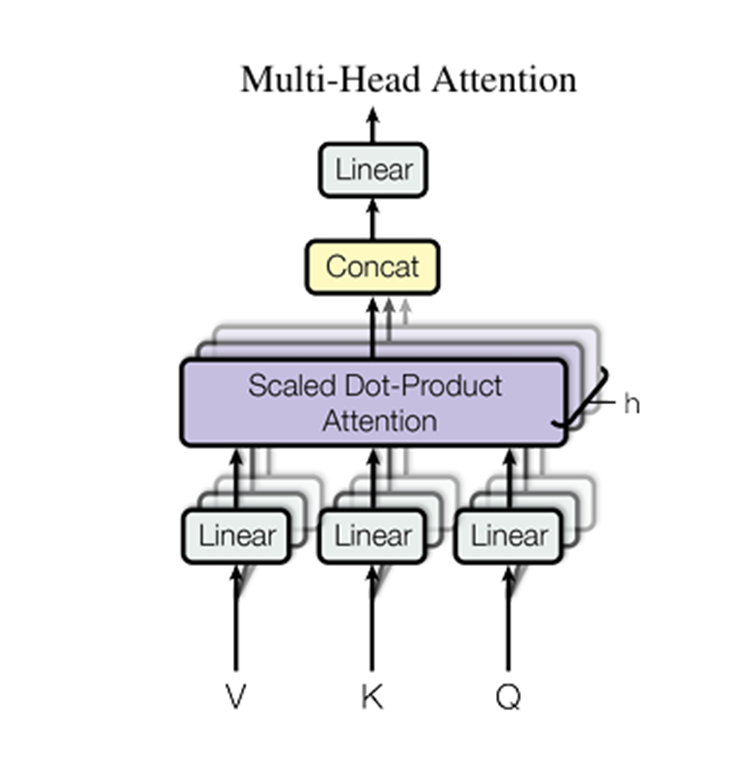

- Multi-Head Attention

여러 개의 head를 두어 모델이 head의 개수만큼 Scaled Dot-Product Attention을 수행할 수 있게 하였다.<br>
이렇게 하면 모델이 다양한 관점에서 Attention을 수행할 수 있다.

- Applications of Attention in our Model

Transformer는 Multi-head attention을 3가지 방법으로 사용하고 있다.

1. Encoder-decoder attention
   - 이전 decoder 레이어에서 오는 query들과 encode의 출력으로 나오는 memory key, value들과의 attention

2. Self-attention in encoder
   - Encoder의 각 위치들은 이전 레이어의 모든 위치들을 참조할 수 있다.

3. Self-attention in decoder
   - decoder의 각 위치들은 decoder 내의 다른 위치들을 참조할 수 있는데, 이전부터 자신 위치까지만 참조할 수 있다. 뒤쪽은 참조할 수 없음.


- Position-wise Feed-Forward Networks
    - Attention layer와 함께 fully connected feed-forward network가 사용된다. 인코더 및 디코더 각 계층에 개별적으로 위치한다.

- Embeddings and Softmax
    - 다른 sequence transduction 모델들과 마찬가지로 input과 output 토큰을 embedding layer를 거쳐서 사용한다.<br>
    이렇게 생성된 embedded vector는 semantic한 특성을 잘 나타내게 된다.<br>
    또한 input embedding 과 output embedding에서 weight matrix를 서로 공유하여 사용한다.

- Positional Encoding
    - 토큰의 상대적인 위치에 대한 정보를 제공하기 위한 역할을 한다.
    - Transformer 에서 Attention 매커니즘만 사용하여 만들기 때문에 시퀀스의 정보를 담아낼 수 없어 Positional Encoding을 사용한다.
    - 논문에서는 고정된 k에 대해 PEpos+k가 PEpos의 선형 함수로 표현될 수 있기 때문에 모델이 쉽게 상대적인 위치를 참조할 수 있을 것이라 가정하여 sine, cosine 함수를 사용하였다.



### Why Self-Attention

Self-Attention을 사용한 이유

- RNN 계열에서는 하지 못했던 병렬 처리 연산을 사용하여 하나의 레이어 당 전체 연산 복잡도를 감소 시켰다. 그래서 학습 시간이 감소되었다.

- 트랜스포머 모델은 대응관계가 있는 토큰들 간의 물리적인 거리 값들 중 최대값이 다른 모델에 비해 매우 짧아 ‘장기간 의존성을 잘 학습 할 수 있고 시퀀스 변환 문제도 잘 해결할 수 있다.

- Attention이라는 가중치를 시각화하여 토큰들 간의 대응관계를 눈으로 직접 확인 가능하다.

### Training

- Training Data
    - 영어-독일어 (WMT 2014 English-German 데이터셋)
    - 영어-프랑스어(WMT 2014 English-French 데이터셋)

- Hardward and Schedule
    - 8개의 NVIDIA P100 GPU로 학습을 시켰고, base model은 12시간 동안 (100,000 step) 학습, big model 은 3.5일 동안 (300,000 step) 학습시켰다.

- Optimizer
    - Adam을 사용하였다.

- Regularization
    - Residual Dropout
        - 하위 레이어 입력이 추가되고 정규화되기 전에, 각 하위 계층의 출력에 드롭아웃을 적용하였다.<br>
        또한, 인코더와 디코더 스택 모두에서 임베딩과 위치 인코딩의 합계에 드롭아웃을 적용하였다.

    - Label Smoothing
        - 훈련하는동안 label smoothing value ϵls=0.1𝜖𝑙𝑠=0.1을 사용하였다.

### Results & Conclsion

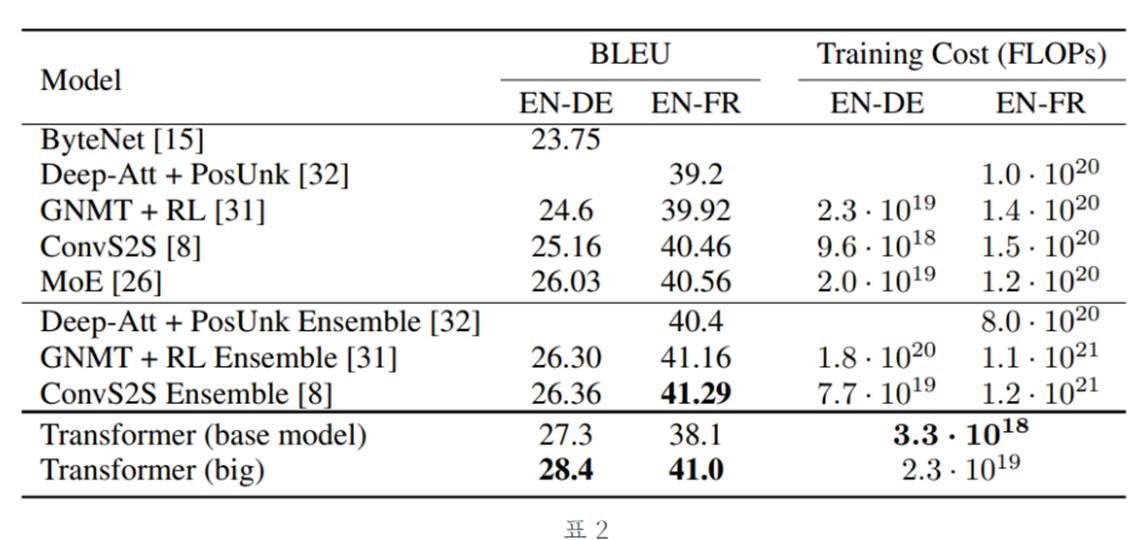

- base model 에서 기존 architecture와 비슷한 성능을 보여주었다.
- 파라미터 수를 늘려 big model을 사용했을 때 <br>
영어-독일어 번역 작업에서 이전에 발표된 모델보다 2 BLEU 이상의 점수인 28.4를 기록하였다.<br>
영어-프랑스어 번역 작업에서는 41.8 BLEU를 기록하고 학습 시간은 훨씬 짧았다.

- 결과적으로 제안한 Transformer는 Attention 매커니즘만 적용하여 보다 높은 병렬성을 얻어 다른 architecture보다 더 좋은 성능을 보여줄 수 있었다.